In [ ]:
Predicting the Temperature on the basis humidity By using Linear Regression¶

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error # Import sklearn for Stat. calculation 

In [2]:
 #read the data using pandas dataframe
Weather=pd.read_csv('NORMAL_DLY_sample_csv (1).csv')

In [3]:
# Show the dataset information!
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
STATION            365 non-null object
STATION_NAME       365 non-null object
ELEVATION          365 non-null float64
LATITUDE           365 non-null float64
LONGITUDE          365 non-null float64
DATE               365 non-null int64
DLY-TMIN-NORMAL    365 non-null int64
DLY-TMAX-NORMAL    365 non-null int64
MTD-PRCP-NORMAL    365 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 25.8+ KB


In [4]:
# Show the data head!
Weather.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-TMIN-NORMAL,DLY-TMAX-NORMAL,MTD-PRCP-NORMAL
0,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100101,-33,145,2
1,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100102,-35,144,4
2,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100103,-36,143,5
3,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100104,-38,142,7
4,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100105,-39,141,9


In [5]:
# Show the data tail!
Weather.tail()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-TMIN-NORMAL,DLY-TMAX-NORMAL,MTD-PRCP-NORMAL
360,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20101227,-23,154,64
361,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20101228,-25,152,67
362,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20101229,-27,150,69
363,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20101230,-29,148,71
364,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20101231,-31,147,73


In [6]:
# Show the minimum value of dataset!
Weather.min()

STATION               GHCND:USC00327027
STATION_NAME       PETERSBURG 2 N ND US
ELEVATION                         466.3
LATITUDE                        48.0355
LONGITUDE                        -98.01
DATE                           20100101
DLY-TMIN-NORMAL                     -48
DLY-TMAX-NORMAL                     138
MTD-PRCP-NORMAL                       1
dtype: object

In [7]:
# Show the max value of dataset!
Weather.max()

STATION               GHCND:USC00327027
STATION_NAME       PETERSBURG 2 N ND US
ELEVATION                         466.3
LATITUDE                        48.0355
LONGITUDE                        -98.01
DATE                           20101231
DLY-TMIN-NORMAL                     567
DLY-TMAX-NORMAL                     805
MTD-PRCP-NORMAL                     376
dtype: object

In [8]:
# mean of dataset
Weather.mean()

ELEVATION          4.663000e+02
LATITUDE           4.803550e+01
LONGITUDE         -9.801000e+01
DATE               2.010067e+07
DLY-TMIN-NORMAL    2.820356e+02
DLY-TMAX-NORMAL    4.931863e+02
MTD-PRCP-NORMAL    8.759178e+01
dtype: float64

In [9]:
#descriptive statistics summary
Weather.describe()

,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-TMIN-NORMAL,DLY-TMAX-NORMAL,MTD-PRCP-NORMAL
count,3.650000e+02,3.650000e+02,3.650000e+02,3.650000e+02,365.000000,365.000000,365.000000
mean,4.663000e+02,4.803550e+01,-9.801000e+01,2.010067e+07,282.035616,493.186301,87.591781
std,1.138429e-12,8.538217e-14,4.838323e-13,3.454755e+02,214.003559,237.933326,81.964080
min,4.663000e+02,4.803550e+01,-9.801000e+01,2.010010e+07,-48.000000,138.000000,1.000000
25%,4.663000e+02,4.803550e+01,-9.801000e+01,2.010040e+07,73.000000,247.000000,27.000000
50%,4.663000e+02,4.803550e+01,-9.801000e+01,2.010070e+07,307.000000,531.000000,56.000000
75%,4.663000e+02,4.803550e+01,-9.801000e+01,2.010100e+07,489.000000,725.000000,131.000000
max,4.663000e+02,4.803550e+01,-9.801000e+01,2.010123e+07,567.000000,805.000000,376.000000


In [10]:
#Giving the information about the null value in the feature
Weather.isnull().any()

STATION            False
STATION_NAME       False
ELEVATION          False
LATITUDE           False
LONGITUDE          False
DATE               False
DLY-TMIN-NORMAL    False
DLY-TMAX-NORMAL    False
MTD-PRCP-NORMAL    False
dtype: bool

In [11]:
#Let's drop the target coloumn before we do train test split
Weather.drop(['STATION','STATION_NAME','ELEVATION','LATITUDE','LONGITUDE'],axis=1,inplace=True)

In [12]:
Weather

,DATE,DLY-TMIN-NORMAL,DLY-TMAX-NORMAL,MTD-PRCP-NORMAL
0,20100101,-33,145,2
1,20100102,-35,144,4
2,20100103,-36,143,5
3,20100104,-38,142,7
4,20100105,-39,141,9
...,...,...,...,...
360,20101227,-23,154,64
361,20101228,-25,152,67
362,20101229,-27,150,69
363,20101230,-29,148,71


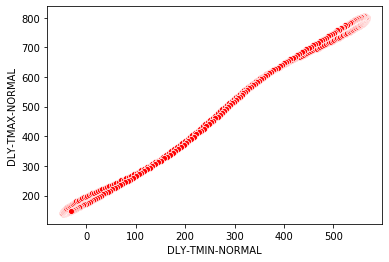

In [13]:
#Exploring and visualizing the datset.
sns.scatterplot(x='DLY-TMIN-NORMAL',y='DLY-TMAX-NORMAL',data=Weather,color='Red')

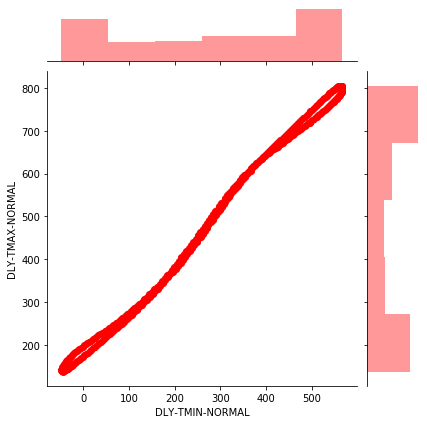

In [14]:
#for visualization
sns.jointplot(x='DLY-TMIN-NORMAL',y='DLY-TMAX-NORMAL',data=Weather,color='Red')

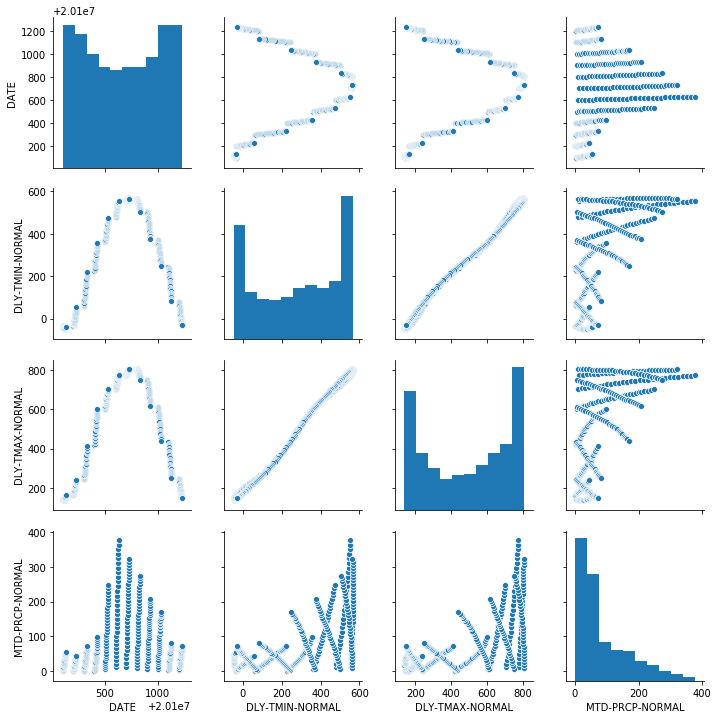

In [15]:
# Visualization which is used for to show the summary.
sns.pairplot(Weather)

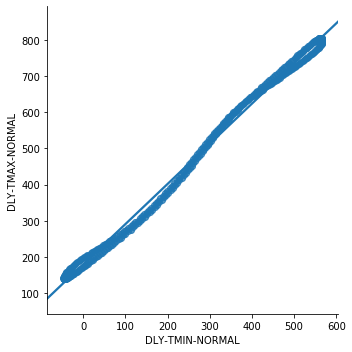

In [16]:
#for visualization show the best line.
sns.lmplot(x='DLY-TMIN-NORMAL',y='DLY-TMAX-NORMAL',data=Weather)

In [17]:
X=Weather[['DLY-TMIN-NORMAL']] # input variable

In [18]:
y=Weather['DLY-TMAX-NORMAL'] #target variable

In [19]:
X

,DLY-TMIN-NORMAL
0,-33
1,-35
2,-36
3,-38
4,-39
...,...
360,-23
361,-25
362,-27
363,-29


In [20]:
y

0      145
1      144
2      143
3      142
4      141
      ... 
360    154
361    152
362    150
363    148
364    147
Name: DLY-TMAX-NORMAL, Length: 365, dtype: int64

In [21]:
# splitting the data in train set and test set.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [22]:
X_train

,DLY-TMIN-NORMAL
211,564
340,48
202,567
75,145
84,194
...,...
71,123
106,302
270,382
348,14


In [23]:
X_test

,DLY-TMIN-NORMAL
193,565
33,-31
15,-47
309,218
57,52
...,...
203,567
82,183
94,246
192,565


In [24]:
X_train.shape

(292, 1)

In [25]:
y_test

193    791
33     169
15     140
309    399
57     236
      ... 
203    800
82     363
94     448
192    790
325    294
Name: DLY-TMAX-NORMAL, Length: 73, dtype: int64

In [26]:
from sklearn import linear_model
regressor=linear_model.LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)#training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print('Score:', regressor.score(X_test, y_test))

Score: 0.995273424136983


In [28]:
#Coefficient(b) & Intercept(m)
print('Linear Model coefficient (m)',regressor.coef_)#To retrieve the slope:
print('Linear Model coefficient (b)',regressor.intercept_ )#To retrieve the intercept:

Linear Model coefficient (m) [1.10839531]
Linear Model coefficient (b) 180.73787683458704


In [29]:
y_predict= regressor.predict(X_test)

In [30]:
from sklearn.model_selection import cross_val_score, cross_val_predict
# Perform 10-fold cross validation
scores = cross_val_score(regressor, X, y, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [-3.00968546  0.83494513  0.95164768  0.70733078  0.37667762 -2.71107408
  0.77975571  0.84632078  0.86421742  0.76822334]


Text(0, 0.5, 'actual Temp vs Temperature')

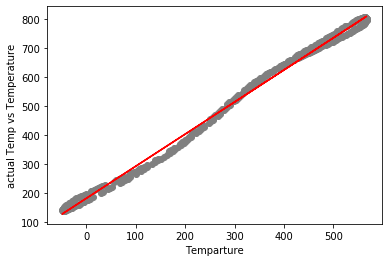

In [31]:
plt.scatter(X_train, y_train,color='gray')
plt.plot(X_train, regressor.predict(X_train),color='red')
plt.xlabel('Temparture')
plt.ylabel('actual Temp vs Temperature')

In [32]:
k=X_test.shape[1]
n=len(X_test)
print('X_test shape k=',k)
print('length of X_Test n=',n)

X_test shape k= 1
length of X_Test n= 73


In [33]:
#Calculating RMSE,MSE,MAE,R2_SCORE,ADj_R2,MAPE
RMSE=float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3f'))
MSE=mean_squared_error(y_test,y_predict)
MAE=mean_absolute_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
MAPE=np.mean( np.abs((y_test-y_predict)/ y_test))*100

In [34]:
print('Root Mean Squared Error (RMSE)= ',RMSE)
print('Mean Squared Error(MSE)= ',MSE)
print('Mean Absolute Error(MAE)',MAE)
print('r2= ',r2)
print('adj_r2= ',adj_r2)
print('mean absolute percentage error (MAPE)= ',MAPE)

Root Mean Squared Error (RMSE)=  16.404
Mean Squared Error(MSE)=  269.0839958118832
Mean Absolute Error(MAE) 14.621082608556229
r2=  0.995273424136983
adj_r2=  0.9952068526459547
mean absolute percentage error (MAPE)=  4.532646431495035


In [35]:
import statsmodels.api as sn
res = sn.OLS(y_train, X_train).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        DLY-TMAX-NORMAL   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              7761.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):                   7.32e-212
Time:                        21:52:07   Log-Likelihood:                         -1777.3
No. Observations:                 292   AIC:                                      3557.
Df Residuals:                     291   BIC:                                      3560.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
DLY-TMIN-NORMAL     1.5129      0.017     88.097      0.000       1.479       1.547
==============================================================================
Omnibus:                       52.621   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.546
Skew:                           0.282   Prob(JB):                     0.000421
Kurtosis:                       2.021   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
y_predict=regressor.predict(X_test)

Score: 0.995273424136983


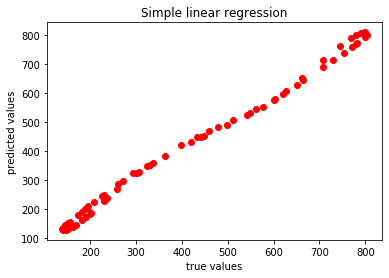

In [38]:
plt.scatter(y_test,y_predict,color='red')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Simple linear regression")
print('Score:', regressor.score(X_test, y_test))

In [39]:
coeff_df=pd.DataFrame(regressor.coef_, X.columns,columns=['coefficients'])
coeff_df

,coefficients
DLY-TMIN-NORMAL,1.108395
